In [1]:
import cv2
import tensorflow
import tensorflow.keras
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
import os
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import random
import shutil
import numpy as np

In [2]:
from keras.applications import vgg16

In [3]:
vgg_conv = vgg16.VGG16(weights = "imagenet", include_top = False, input_shape = (224,224,3))

In [4]:
for layer in vgg_conv.layers[:]:
    layer.trainable = False

for layer in vgg_conv.layers[:]:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000019751C749D0> False
<keras.layers.convolutional.Conv2D object at 0x0000019751CACA30> False
<keras.layers.convolutional.Conv2D object at 0x0000019751CFF280> False
<keras.layers.pooling.MaxPooling2D object at 0x0000019751CFF1F0> False
<keras.layers.convolutional.Conv2D object at 0x0000019751DA7610> False
<keras.layers.convolutional.Conv2D object at 0x0000019752045A90> False
<keras.layers.pooling.MaxPooling2D object at 0x0000019751D9CF40> False
<keras.layers.convolutional.Conv2D object at 0x000001975204D730> False
<keras.layers.convolutional.Conv2D object at 0x0000019752055D00> False
<keras.layers.convolutional.Conv2D object at 0x000001975205BA00> False
<keras.layers.pooling.MaxPooling2D object at 0x000001975204A670> False
<keras.layers.convolutional.Conv2D object at 0x000001975206DF70> False
<keras.layers.convolutional.Conv2D object at 0x0000019752074430> False
<keras.layers.convolutional.Conv2D object at 0x0000019752067940> False
<ker

In [5]:
model = Sequential()

# inserting the conv layers on top of the base classification layer
model.add(vgg_conv)  

# creating the classification layers
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu', use_bias = True))
model.add(Dense(units=1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 27,560,769
Trainable params: 12,846,081
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
Dataset = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\covid_direc"

In [8]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                                                    #width_shift_range = 0.2,
                                                                    #brightness_range = [0.2,1],
                                                                    #horizontal_flip = True,
                                                                    #zoom_range = 0.2,
                                                                    validation_split=0.2)

train_data = train_datagen.flow_from_directory(Dataset,
                                                                            subset = 'training',
                                                                            class_mode = 'binary',
                                                                            target_size = (224, 224) 
                                                                            )

validation_data =  train_datagen.flow_from_directory(Dataset,
                                                                                     subset = 'validation',
                                                                                     class_mode = 'binary',
                                                                                     target_size = (224, 224)
                                                                                     )

Found 5779 images belonging to 2 classes.
Found 1444 images belonging to 2 classes.


In [ ]:
history = model.fit(train_data, validation_data = validation_data, epochs = 20, batch_size = 32, steps_per_epoch = 10)

#### Model ended up with 97% of training accuracy

In [9]:
model.load_weights("covid_cnn_vgg16.h5")

#### Model Testing

In [10]:
def read_img(img_path):
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
    return resized_image

test_image1 = read_img(r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-12.png")
print(f"Shape of the image: {test_image1.shape}")
test_image1 = test_image1[np.newaxis,:,:,:]
model.predict(test_image1)

Shape of the image: (224, 224, 3)


array([[0.00012472]], dtype=float32)

In [25]:
Test_Dir = r"C:\Users\Teja Nikhil\Semester - III\Covid Diagnostics_ICS Endsem\Train CXR\Negative CXR"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(list(model.predict(test_image)))
    
list(Predictions)

[[array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array([1.], dtype=float32)],
 [array(

In [11]:
Test_Dir = r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing"
Testing_Images = os.listdir(Test_Dir)
Predictions = []
for i in Testing_Images:
    direc = os.path.join(Test_Dir, i)
    test_image = read_img(direc)
    test_image = test_image[np.newaxis,:,:,:]
    Predictions.append(model.predict(test_image))
    
preds = np.array(Predictions)
(preds)

array([[[1.2472272e-04]],

       [[1.0000000e+00]],

       [[1.0000000e+00]],

       [[1.0000000e+00]],

       [[2.2531469e-31]],

       [[1.0000000e+00]],

       [[1.0000000e+00]],

       [[1.0000000e+00]],

       [[1.0000000e+00]],

       [[1.0000000e+00]]], dtype=float32)

### Applying LIME Explainability on CNN Model

In [12]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
print('Notebook running: keras ', tensorflow.keras.__version__)
np.random.seed(222)

Notebook running: keras  2.7.0


In [13]:
def readImage(Image_Path):
    image = cv2.imread(Image_Path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = skimage.transform.resize(image, (224 ,224)) 
    return image

def draw_Img(img, title = "Image"):
    plt.imshow(img)
    plt.axis('off')
    plt.style.use('seaborn')
    plt.title(title+str(img.shape))
    skimage.io.imshow(Image) 
    plt.show()

def Generate_Superpixels(Image, pixel_dist):
    superpixels = skimage.segmentation.quickshift(Image, kernel_size = 3, max_dist = pixel_dist, ratio = 0.2)
    num_superpixels = np.unique(superpixels).shape[0]
    print(f"Number of Super pixels generated: {num_superpixels}")
    return num_superpixels, superpixels

def Generate_Perturbations(num_perturbations):
    perturbations = np.random.binomial(1, 0.5, size=(num_perturbations, num_superpixels))
    # each row represnt each perturbation 
    # each column represent the super pixels
    print(f"Changes in the superpixels in each perturbations are: {len(perturbations[0])}")
    print(f"Number of perturbations: {len(perturbations)}")
    return perturbations

def perturb_Image(img, perturbation, segments):
    active_pixels = np.where(perturbation == 1)[0]
    mask = np.zeros(segments.shape)
    for active in active_pixels:
        mask[segments == active] = 1 
    perturbed_image = copy.deepcopy(img)
    perturbed_image = perturbed_image*mask[:,:,np.newaxis]
    return perturbed_image

def Compute_Distances(num_superpixels, perturbations):
    original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
    distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
    distances.shape
    return distances


def Compute_weights(distances, kernel_width):
    weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
    return weights

def fit_weights(perturbations, predictions, weights):
    simpler_model = LinearRegression()
    simpler_model.fit(X=perturbations, y=predictions[:,:,0], sample_weight=weights)
    coeff = simpler_model.coef_[0]
    return coeff

def mask_image(Image, num_superpixels, super_pixels, num_top_features, coeff):
    top_features = np.argsort(coeff)[-num_top_features:] 
    mask = np.zeros(num_superpixels) 
    mask[top_features]= True #Activate top superpixels
    skimage.io.imshow(perturb_Image(Image,mask,super_pixels))
    return top_features

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

#### Generating Superpixels

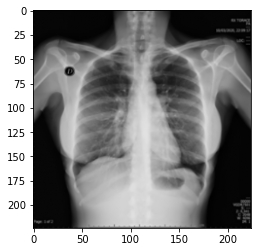

In [15]:
Image_Path =  r"C:\Users\Teja Nikhil\OneDrive\Desktop\COVID-19_Radiography_Dataset\Testing\COVID-22.png"
Image = readImage(Image_Path)
plt.imshow(Image)

#### Generating Superpixels

Number of Super pixels generated: 51


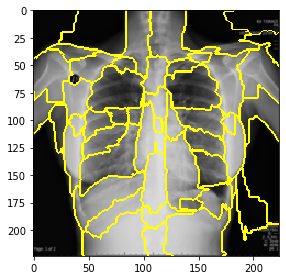

In [16]:
# draw_Img(Image)
num_superpixels , super_pixels = Generate_Superpixels(Image, 200)
skimage.io.imshow(skimage.segmentation.mark_boundaries(Image, super_pixels))

#### Generating Perturbations

Changes in the superpixels in each perturbations are: 51
Number of perturbations: 150


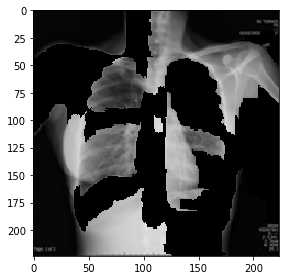

In [17]:
perturbations = Generate_Perturbations(150)
skimage.io.imshow(perturb_Image(Image, perturbations[0],super_pixels))

In [18]:
Perturbated_Df = pd.DataFrame(perturbations.flatten())
Perturbated_Df.shape
predictions = []

#### Making Predictions

In [19]:
for pert in perturbations:
    perturbed_img = perturb_Image(Image,pert,super_pixels)
    pred = model.predict(perturbed_img[np.newaxis,:,:,:])
    predictions.append(pred)

In [20]:
predictions = np.array(predictions)

#### Compute distances and weights

In [21]:
distances = Compute_Distances(num_superpixels, perturbations)

In [22]:
weights = Compute_weights(distances, 0.25)

#### Linear regression using predictions and weights

In [23]:
coeffs = fit_weights(perturbations, predictions, weights)

#### Plotting the masked image

[[0.97122586]]


array([46, 18, 47, 38, 48,  0, 27, 32, 29, 42,  1, 37, 49, 35, 40],
      dtype=int64)

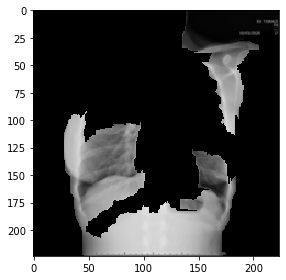

In [28]:
print(model.predict(Image[np.newaxis,:,:,:]))
mask_image(Image, num_superpixels, super_pixels, 15, coeffs)